In [3]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data

In [4]:
from keras.datasets import fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
X_train.shape, X_valid.shape

((55000, 28, 28), (5000, 28, 28))

In [6]:
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

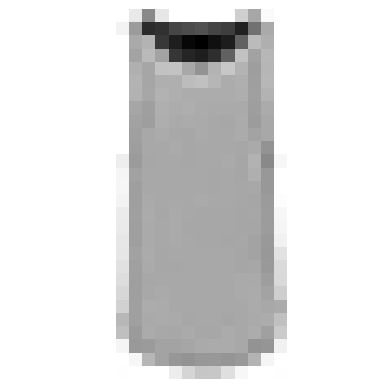

In [7]:
plt.imshow(X_train[2], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", 
               "Dress", "Coat", "Sandal", "Shirt",
               "Sneaker", "Bag", "Ankle boot"]

# Creating model using squential API

## Creating model

In [10]:
X_train[0].shape

(28, 28)

In [12]:
tf.keras.backend.clear_session()

tf.random.set_seed(2024)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

c:\Users\Mr.Grumpy\miniconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,810 (1.21 MB)

 Trainable params: 316,810 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

### Parameter initialzation

In [14]:
hidden1 = model.layers[1]

In [15]:
weights, biases = hidden1.get_weights()
weights, biases

(array([[-0.02194275,  0.00084548, -0.06419654, ...,  0.01841462,
         -0.06273033,  0.07158813],
        [ 0.01686925,  0.05947974, -0.00103083, ..., -0.0718288 ,
          0.04212524,  0.05395515],
        [-0.07322929,  0.05649687,  0.04251918, ..., -0.0159513 ,
         -0.04219702,  0.0433083 ],
        ...,
        [ 0.05799606, -0.01595502,  0.01986425, ...,  0.07187127,
         -0.04434091,  0.03882295],
        [-0.0318699 , -0.04986309, -0.00657239, ..., -0.03145136,
          0.02409464,  0.0042703 ],
        [ 0.05028341,  0.04315671, -0.03749513, ..., -0.00333154,
          0.04299416,  0.06430893]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

## Compiling the model

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
    optimizer = 'sgd',
    metrics = ["accuracy"]
)

## Training and testing the model

In [17]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6833 - loss: 1.0392 - val_accuracy: 0.8284 - val_loss: 0.5018
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8325 - loss: 0.4898 - val_accuracy: 0.8466 - val_loss: 0.4408
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8506 - loss: 0.4335 - val_accuracy: 0.8584 - val_loss: 0.4131
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8609 - loss: 0.4010 - val_accuracy: 0.8638 - val_loss: 0.3917
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8682 - loss: 0.3781 - val_accuracy: 0.8650 - val_loss: 0.3777
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8737 - loss: 0.3603 - val_accuracy: 0.8678 - val_loss: 0.3653
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8778 - loss: 0.3454 - val_accuracy: 0.8702 - val_loss: 0.3574
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8819 - loss: 0.3327 - 